<a href="https://colab.research.google.com/github/sthe-rms/algoritmo_K-means/blob/main/K_means_Dataset_Human_Activity_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving UCI HAR Dataset.zip to UCI HAR Dataset.zip


In [9]:
import zipfile
import os

zip_file = "UCI HAR Dataset.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("UCI HAR Dataset")

print("Arquivos extraídos:")
print(os.listdir("UCI HAR Dataset"))

Arquivos extraídos:
['UCI HAR Dataset', '__MACOSX']


<ipython-input-10-6af42ee59a90>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-10-6af42ee59a90>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
<ipython-input-10-6af42ee59a90>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)


Dimensão do dataset: (7352, 561)

Estatísticas descritivas:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.0000

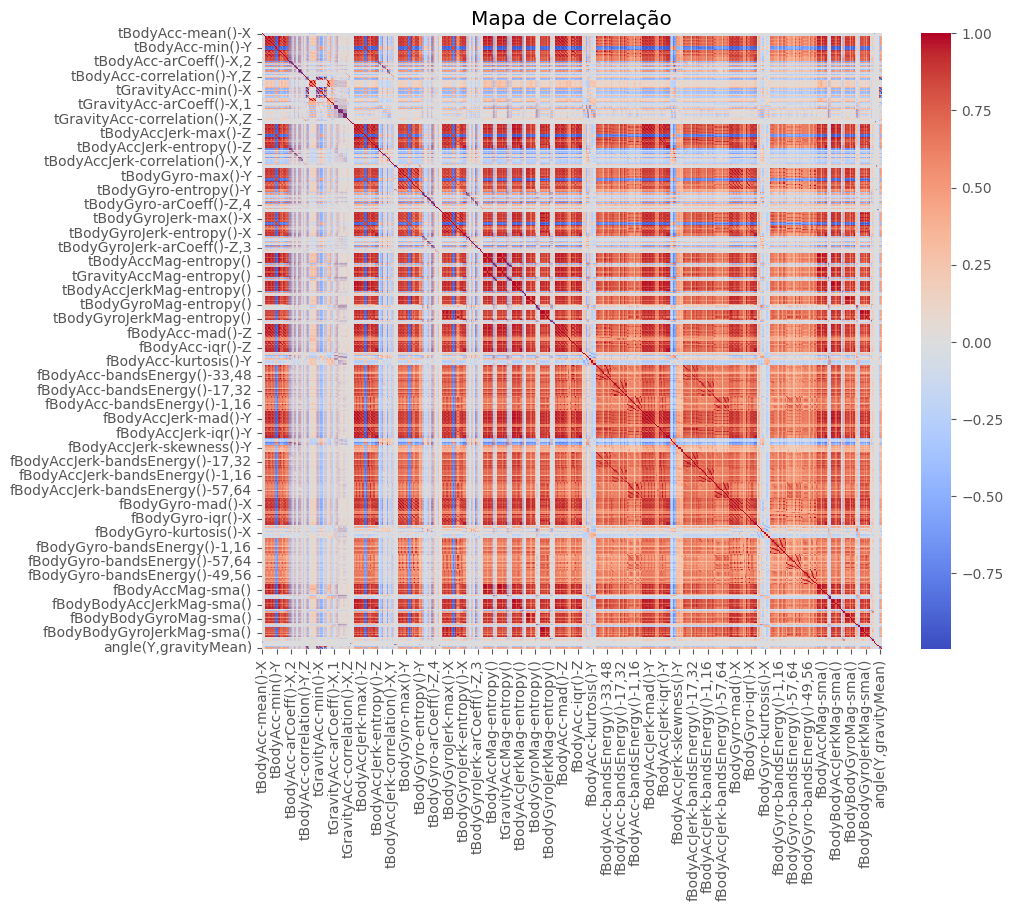

Variância explicada pelos dois primeiros componentes: 0.57


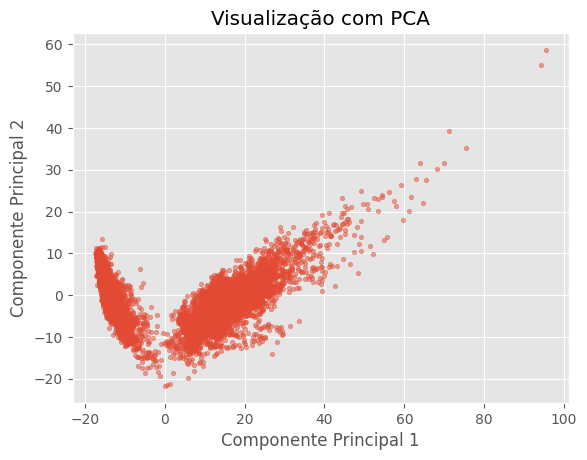

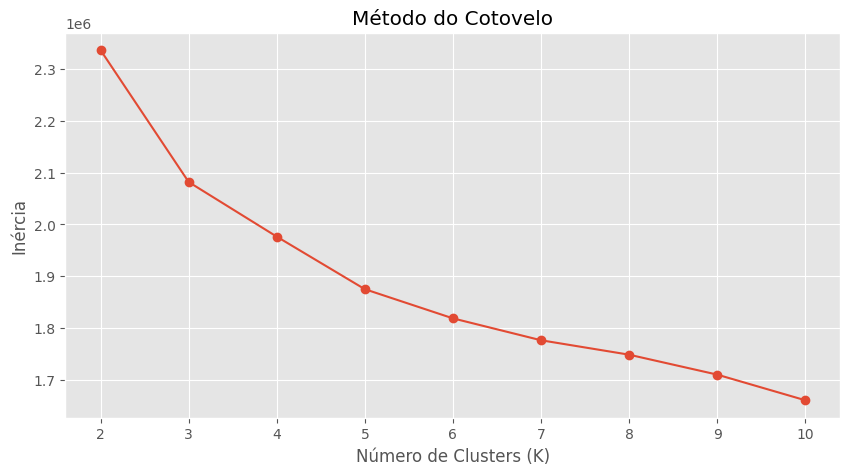

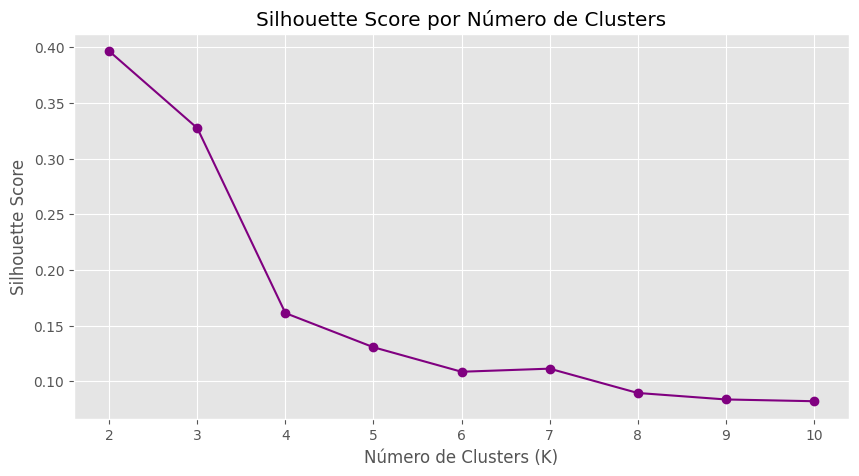

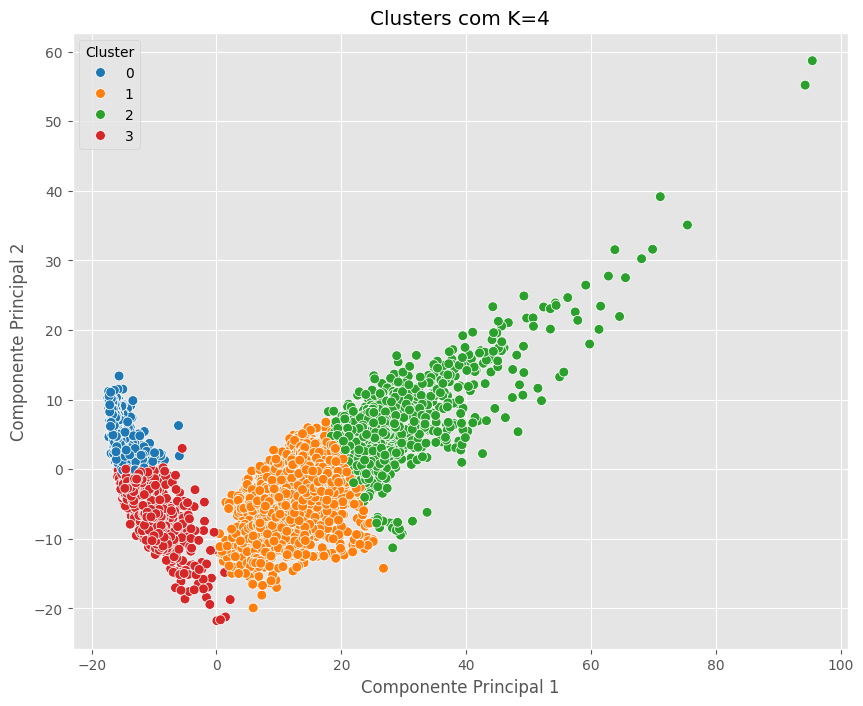

Silhouette Score para K=4: 0.161


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

plt.style.use('ggplot')

X_train = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
features = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)

X_train.columns = features[1].values

print("Dimensão do dataset:", X_train.shape)
print("\nEstatísticas descritivas:")
print(X_train.describe())

corr_matrix = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)
plt.title('Mapa de Correlação')
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Variância explicada pelos dois primeiros componentes: {sum(pca.explained_variance_ratio_):.2f}")

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
plt.title('Visualização com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

#K-means

inertias = []
silhouettes = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(K_values, inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(K_values, silhouettes, marker='o', color='purple')
plt.title('Silhouette Score por Número de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_optimal.fit(X_scaled)

X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Cluster'] = kmeans_optimal.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=50)
plt.title(f'Clusters com K={optimal_k}')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

silhouette_avg = silhouette_score(X_scaled, kmeans_optimal.labels_)
print(f"Silhouette Score para K={optimal_k}: {silhouette_avg:.3f}")
